# Perceptron
### Wx + b = score.
### Using Step Activation function
### if score >= 0 -> fire the next neuron

## AND operator Perceptron

In [2]:
import pandas as pd

weight1 = 1.0
weight2 = 1.0
bias = -2

test_inputs = [(0,0), (0, 1), (1, 0), (1, 1)]
# correct_ouptputs = [False, True, True, True]
correct_outputs = [False, False, False, True]

outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = (weight1 * test_input[0]) + (weight2 * test_input[1]) + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', ' Input 2', ' Linear Combination', ' Activation Output', ' Is Correct'])
if not num_wrong:
    print('Nice you got all correct')
else:
    print('You got {} wrong. Keep tring! \n'.format(num_wrong))

print(output_frame.to_string(index=False))
    


Nice you got all correct
 Input 1   Input 2   Linear Combination   Activation Output  Is Correct
       0         0                 -2.0                   0         Yes
       0         1                 -1.0                   0         Yes
       1         0                 -1.0                   0         Yes
       1         1                  0.0                   1         Yes


## OR operator Perceptron

In [5]:
import pandas as pd

weight1 = 1.0
weight2 = 1.0
bias = -1

test_inputs = [(0,0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, True]
# correct_outputs = [False, False, False, True]

outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = (weight1 * test_input[0]) + (weight2 * test_input[1]) + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', ' Input 2', ' Linear Combination', ' Activation Output', ' Is Correct'])
if not num_wrong:
    print('Nice you got all correct')
else:
    print('You got {} wrong. Keep tring! \n'.format(num_wrong))

print(output_frame.to_string(index=False))
    


Nice you got all correct
 Input 1   Input 2   Linear Combination   Activation Output  Is Correct
       0         0                 -1.0                   0         Yes
       0         1                  0.0                   1         Yes
       1         0                  0.0                   1         Yes
       1         1                  1.0                   1         Yes


## NOT Perceptron

In [1]:
import pandas as pd

weight1 = 1.0
weight2 = -2
bias = 0

test_inputs = [(0,0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
# correct_outputs = [False, False, False, True]

outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = (weight1 * test_input[0]) + (weight2 * test_input[1]) + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', ' Input 2', ' Linear Combination', ' Activation Output', ' Is Correct'])
if not num_wrong:
    print('Nice you got all correct')
else:
    print('You got {} wrong. Keep tring! \n'.format(num_wrong))

print(output_frame.to_string(index=False))
    


Nice you got all correct
 Input 1   Input 2   Linear Combination   Activation Output  Is Correct
       0         0                  0.0                   1         Yes
       0         1                 -2.0                   0         Yes
       1         0                  1.0                   1         Yes
       1         1                 -1.0                   0         Yes


Epoch:  0
Valid Points: 90
Invalid Points: 16
90/100
--------------------------------------
Epoch:  1
Valid Points: 93
Invalid Points: 15
93/100
--------------------------------------
Epoch:  2
Valid Points: 94
Invalid Points: 14
94/100
--------------------------------------
Epoch:  3
Valid Points: 93
Invalid Points: 15
93/100
--------------------------------------
Epoch:  4
Valid Points: 93
Invalid Points: 16
93/100
--------------------------------------
Epoch:  5
Valid Points: 93
Invalid Points: 15
93/100
--------------------------------------
Epoch:  6
Valid Points: 92
Invalid Points: 17
92/100
--------------------------------------
Epoch:  7
Valid Points: 93
Invalid Points: 16
93/100
--------------------------------------
Epoch:  8
Valid Points: 92
Invalid Points: 17
92/100
--------------------------------------
Epoch:  9
Valid Points: 92
Invalid Points: 17
92/100
--------------------------------------
Epoch:  10
Valid Points: 92
Invalid Points: 18
92/100
--------------------------

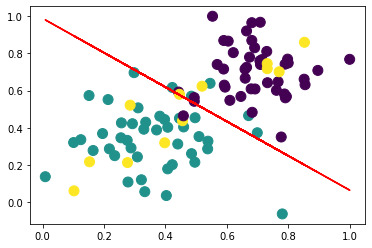

In [1]:
from init import run

run()

## Cross Entropy

In [10]:
import numpy as np
import math

P = [1, 0, 1, 1]
Y = [0.4, 0.6, 0.1, 0.5]

def cross_entropy(Y, P):
    def neg_ln(idx_tup):
        idx = idx_tup[0]
        point = Y[idx]
        prob = P[idx]
        return point * math.log(prob) + (1 - point) * math.log(1 - prob)
        
    nat_ln = [neg_ln(idx) for idx in enumerate(Y)]
    result = np.sum(nat_ln) * (-1)
    return result

    # OR
    # Y = np.float_(Y)
    # P = np.float_(P)
    # return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

x_ent = cross_entropy(P, Y)
print(x_ent)

4.828313737302301


## Gradient Descent

### Calculate Score
- Calculate the score for each point like normal (wx + b)
### New Activation Funtion - from > Step Function > to > Sigmoid Function
- Score values outputted must be continuous. Replace step function with sigmoid function. This will return a probability instead of 1 and 0. When the score is zero, sigmoid of 0 is 0.5. That means there is 50% chance of the point being labelled correctly. If sigmoid(wx + b) is less that 0.5 (aka less than 0.5), sigmoid will approach 0. As values are bigger than 0.5, sigmoid will approach 1. 
### Convert sigmoid score to probability -- SOFTMAX
- Need to convert sigmoid score to being a probability. 
- We can try (point_score / sum(all_points_score) for each point. But this does not work, since denominator cannot be a 0 and we need all probabilities to be positive
- We need to take an exponential approach, since it never returns a negative number. So now we should be doing:
e^point_score/sum(e^another_point + e^another_point + 1 ...) for each point. Now we will always get a positive probability. Softmax is the same as the sigmoid function. Something like this:

In [ ]:
# L is a list of numbers
def softmax(L):
    denom = np.sum(np.exp(L))
    def calc_smax(val):
        return math.exp(val) / denom
    return map(calc_smax, L)

### One hot encoding
- Since there are more than 2 results, we cannot return classified result as 1 and 0. We use once hot encoding.


| Animal | Duck | Beaver | Walrus |   |
|--------|------|--------|--------|---|
| Duck   | 1    | 0      | 0      |   |
| Beaver | 0    | 1      | 0      |   |
| Walrus | 0    | 0      | 1      |   |


100 is Duck
010 is Beaver
001 is Walrus

This is how we will encode and decode the outputs from the model. Each class will have a score.

### Maximum Likelyhood

- Multiply all the probabilites to assess model. Higher probability value is better. Goal is select a model with the highest "Maximum Likelyhood"

- As probability goes up, the error decreases. (By Probability we are talking  about the likelyness of the prediction being correct)

- We want to avoid products. Therefore we should take the -ln(point_probability) will give us a positive number. As this number approaches 0, the model is approaching maximum likelyhood. If this number approches 1, that model has a very low overall probability

- Since ln(1) is 0, all values between ln(0) and ln(1) are negative numbers. We have to multiply by -1 to make the values positive. Which is why as the value goes down, the error is low and vice versa.

- The sum(-ln(points_probabilites)) represents the overall <<<< `CROSS ENTROPY`. Good model low entropy, bad model high entropy



### Cross Entropy

